### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import file
train_df = pd.read_csv(r"D:\01_Sharma\Personal\kaggle\spaceship-titanic\data\train.csv")

In [3]:
# Import file
# train_df = pd.read_csv(r"C:\Users\aayus\Desktop\Secrets-of-the-Universe\spaceship-titanic\data\train.csv")

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.shape

(8693, 14)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


<Axes: xlabel='Transported', ylabel='count'>

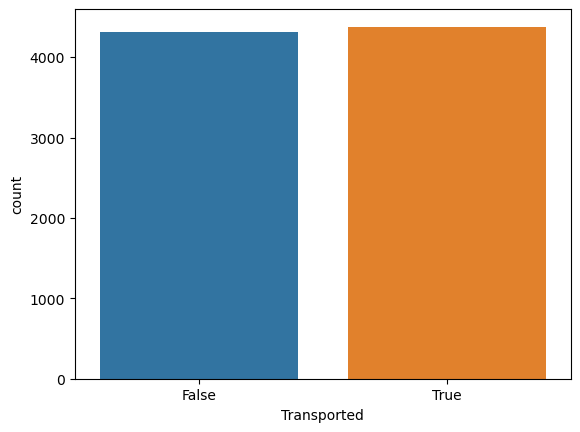

In [9]:
sns.countplot(x='Transported', data=train_df)

In [10]:
passenger_groups = train_df['PassengerId'].apply(lambda x: int((str(x).split("_"))[0]))

In [11]:
print(f"Total number of groups: {len(passenger_groups.unique())}")

Total number of groups: 6217


In [12]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [13]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

<Axes: xlabel='HomePlanet', ylabel='count'>

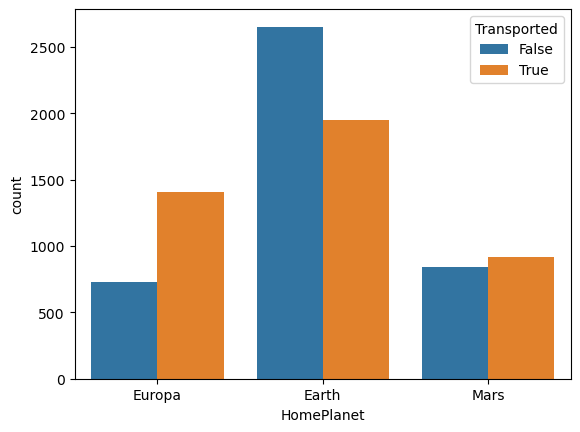

In [14]:
train_df['Transported'] = train_df['Transported'].astype(str)
sns.countplot(x='HomePlanet', data=train_df, hue='Transported')

C:\Users\a.sharma\AppData\Local\Temp\ipykernel_20628\2844993375.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'])
C:\Users\a.sharma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

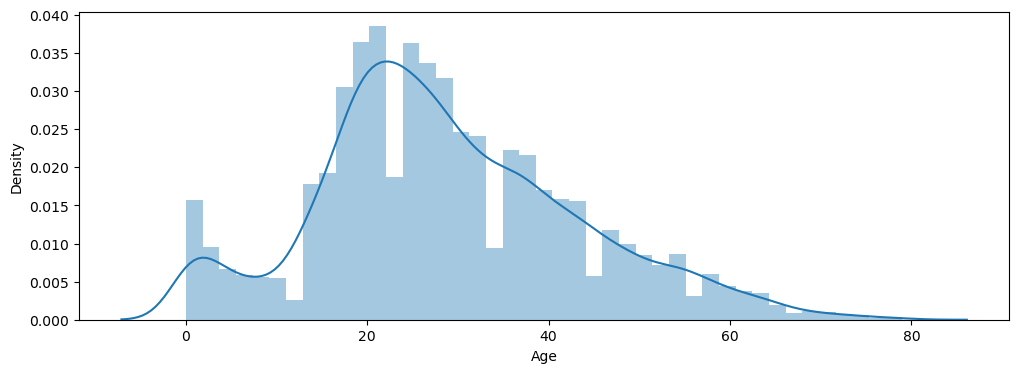

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(train_df['Age'])

In [16]:
sorted(train_df['Age'].unique())[0]

0.0

In [17]:
train_df[train_df['HomePlanet'].isna()].isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [18]:
missing_home_p_df = train_df[train_df['HomePlanet'].isna()]

In [19]:
missing_home_p_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [20]:
def check_relationship(df, column_to_check):
    results = []
    df_not_na = df[pd.notna(df[column_to_check])].copy()
    df_not_na.loc[:, 'Last_Name'] = df_not_na['Name'].apply(lambda x: str(x).strip().split()[-1])
    grouped = df_not_na.groupby('Last_Name')
    for last_name, group in grouped:
        if len(group) > 1:
            list_of_values = group[column_to_check].to_list()
            unique_values = set(list_of_values)
            if len(unique_values) == 1:
                results.append((last_name, 'Same'))
            else:
                results.append((last_name, 'Different'))
    df_not_na = df_not_na.drop(columns=['Last_Name'])
    return pd.DataFrame(results, columns=['Last_Name', 'Relationship'])

In [21]:
results_df = check_relationship(train_df, 'HomePlanet')

<Axes: xlabel='Relationship', ylabel='count'>

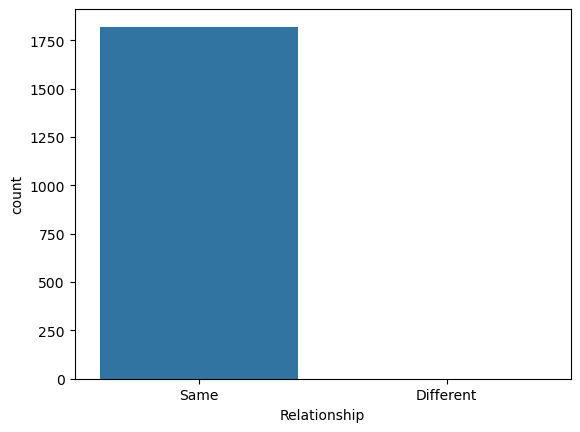

In [22]:
sns.countplot(x='Relationship', data=results_df)

In [23]:
results_df1 = check_relationship(train_df, 'Destination')

<Axes: xlabel='Relationship', ylabel='count'>

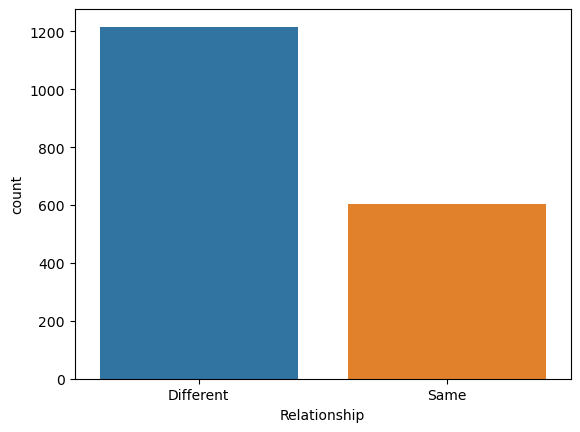

In [24]:
sns.countplot(x='Relationship', data=results_df1)

In [25]:
results_df1

,Last_Name,Relationship
0,Acobson,Different
1,Acobsond,Same
2,Adavisons,Different
3,Adkinson,Different
4,Admingried,Different
...,...,...
1815,Yanton,Different
1816,Yatters,Different
1817,Yorkland,Different
1818,Youngrayes,Same


In [26]:
train_df[train_df['Name'].str.contains('Yorkland', na=False)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
83,0091_01,Earth,True,G/16/S,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,True
84,0091_02,Earth,False,F/20/S,TRAPPIST-1e,27.0,False,1.0,697.0,31.0,188.0,0.0,Tinez Yorkland,False
427,0461_01,Earth,False,E/27/S,PSO J318.5-22,31.0,False,0.0,869.0,0.0,0.0,0.0,Shany Yorkland,True
428,0461_02,Earth,False,F/85/S,TRAPPIST-1e,22.0,False,0.0,70.0,182.0,612.0,20.0,Warry Yorkland,True
429,0461_03,Earth,False,G/66/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Len Yorkland,True
594,0618_01,Earth,False,G/95/P,55 Cancri e,21.0,False,0.0,0.0,908.0,49.0,0.0,Philda Yorkland,True
595,0618_02,Earth,False,F/131/P,PSO J318.5-22,21.0,False,1.0,368.0,0.0,0.0,388.0,Troyce Yorkland,False
2764,2972_01,Earth,False,E/182/P,TRAPPIST-1e,14.0,False,0.0,1.0,1441.0,0.0,190.0,Danna Yorkland,True
3088,3328_01,Earth,False,F/691/P,TRAPPIST-1e,34.0,False,578.0,0.0,0.0,0.0,323.0,Rena Yorkland,False
4920,5247_01,Earth,False,G/848/P,TRAPPIST-1e,38.0,False,6.0,2324.0,0.0,0.0,0.0,Roydo Yorkland,True


In [27]:
results_df2 = check_relationship(train_df, 'CryoSleep')

<Axes: xlabel='Relationship', ylabel='count'>

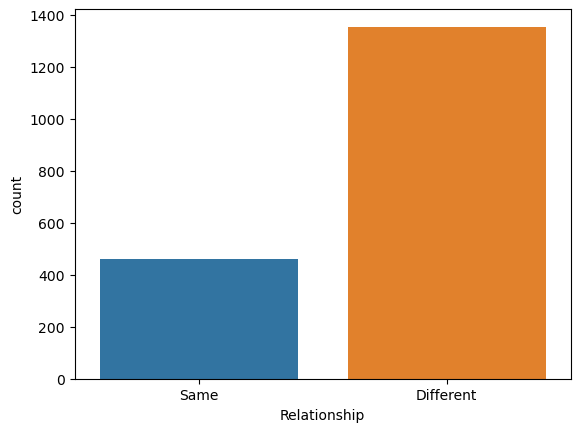

In [28]:
sns.countplot(x='Relationship', data=results_df2)

In [29]:
results_df3 = check_relationship(train_df, 'VIP')

<Axes: xlabel='Relationship', ylabel='count'>

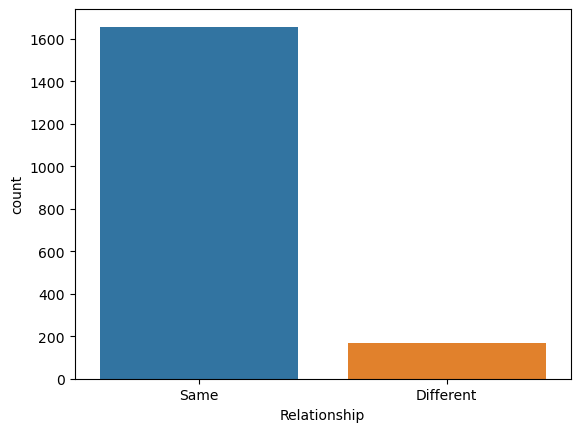

In [30]:
sns.countplot(x='Relationship', data=results_df3)

In [31]:
results_df3[results_df3['Relationship'] == 'Different']

,Last_Name,Relationship
11,Alaring,Different
22,Aloubtled,Different
28,Amincrerus,Different
31,Ancy,Different
43,Apie,Different
...,...,...
1751,Wate,Different
1758,Watuald,Different
1776,Wheededly,Different
1797,Winie,Different


In [32]:
train_df[train_df['Name'].str.contains('Brighttt', na=False)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
20,0017_02,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,Philda Brighttt,False
66,0070_01,Earth,False,F/13/P,TRAPPIST-1e,19.0,False,190.0,0.0,5.0,1.0,726.0,Meremy Brighttt,False
159,0181_01,Earth,False,G/27/P,TRAPPIST-1e,20.0,False,0.0,0.0,3.0,299.0,92.0,Nancis Brighttt,False
708,0743_01,Earth,True,G/111/S,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Loree Brighttt,True
3697,3971_01,Earth,False,G/651/P,TRAPPIST-1e,44.0,False,39.0,821.0,0.0,7.0,41.0,Joanry Brighttt,False


In [33]:
def fill_home_planet(df):
    indexes = df[df['HomePlanet'].isna()].index
    df_notna = df[pd.notna(df['HomePlanet'])]
    for index in indexes:
        name = df['Name'][index]
        if isinstance(name, str):
            last_name = str(name).split()[-1]
            indexes_2 = df_notna[df_notna['Name'].str.contains(last_name, case=False, na=False)].index
            if len(indexes_2) > 0:
                df.loc[index, 'HomePlanet'] = df_notna['HomePlanet'][indexes_2[0]]
    return df

In [34]:
train_df = fill_home_planet(train_df)

In [35]:
train_df.isnull().sum()

PassengerId       0
HomePlanet       14
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [36]:
cryosleep_people = train_df[train_df['CryoSleep'] == True]

In [37]:
cryosleep_people

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8684,9274_01,Earth,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


C:\Users\a.sharma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a.sharma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a.sharma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a.sharma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

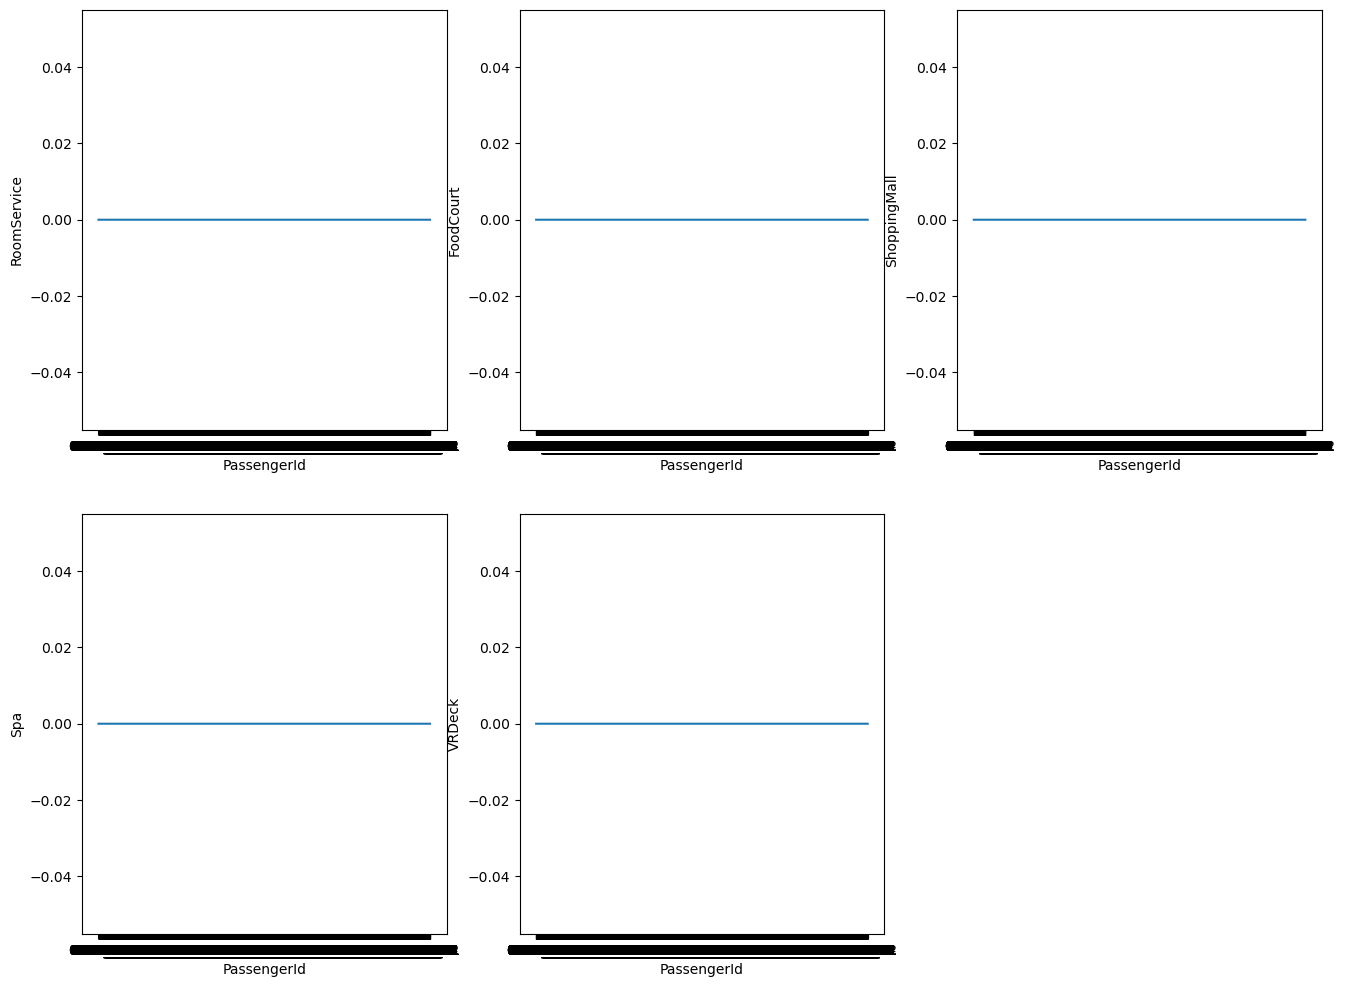

In [38]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
sns.lineplot(data=cryosleep_people, x='PassengerId', y='RoomService')
plt.subplot(2, 3, 2)
sns.lineplot(data=cryosleep_people, x='PassengerId', y='FoodCourt')
plt.subplot(2, 3, 3)
sns.lineplot(data=cryosleep_people, x='PassengerId', y='ShoppingMall')
plt.subplot(2, 3, 4)
sns.lineplot(data=cryosleep_people, x='PassengerId', y='Spa')
plt.subplot(2, 3, 5)
sns.lineplot(data=cryosleep_people, x='PassengerId', y='VRDeck')
plt.show()

In [39]:
def check_count_cryo(df):
    columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    cryo_df = df[pd.notna(df['CryoSleep'])]
    invalid_rows = cryo_df[columns_to_check].apply(lambda row: all(pd.isna(row) | (row == 0)), axis=1)
    invalid_data = cryo_df[invalid_rows]
    return sns.countplot(data=invalid_data, x='CryoSleep')

<Axes: xlabel='CryoSleep', ylabel='count'>

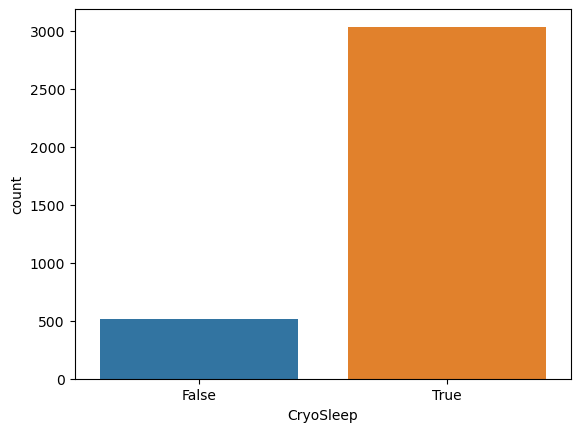

In [40]:
check_count_cryo(train_df)

<Axes: xlabel='CryoSleep', ylabel='count'>

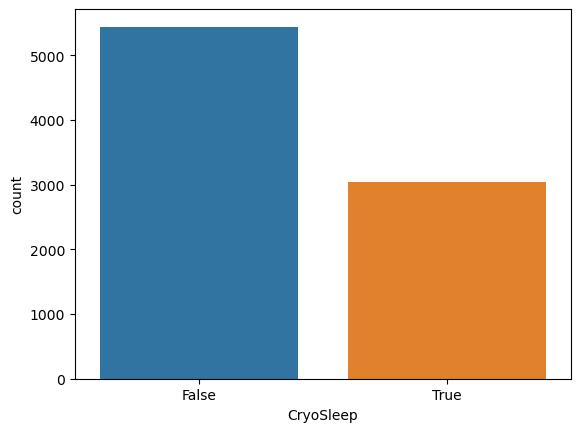

In [41]:
sns.countplot(data=train_df, x='CryoSleep')

In [48]:
def fill_cryo_sleep(df):
    columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    indexes = df[df['CryoSleep'].isna()].index
    for index in indexes:
        n = 0
        for col in columns_to_check:
            if pd.isna(df.loc[index, col]) or df.loc[index, col] == 0 or df.loc[index, col] == '':
                n += 1
        if n < 5:
            df.loc[index, 'CryoSleep'] = False
        else:
            df.loc[index, 'CryoSleep'] = True
    return df            

In [49]:
train_df = fill_cryo_sleep(train_df)

In [50]:
train_df.isnull().sum()

PassengerId       0
HomePlanet       14
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [53]:
def fill_expenditure(df):
    for row in range(df.shape[0]):
        if df['CryoSleep'][row] == True:
            df.loc[row, 'RoomService'] = 0.0
            df.loc[row, 'FoodCourt'] = 0.0
            df.loc[row, 'ShoppingMall'] = 0.0
            df.loc[row, 'VRDeck'] = 0.0
            df.loc[row, 'Spa'] = 0.0
    return df

In [54]:
train_df = fill_expenditure(train_df)

In [55]:
train_df.isnull().sum()

PassengerId       0
HomePlanet       14
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       112
ShoppingMall    109
Spa             116
VRDeck          121
Name            200
Transported       0
dtype: int64

In [63]:
def group_passengerid(df):
    df_pid = df[pd.notna(df['Name'])].copy()
    df_pid.loc[:, 'PassengerGroup'] = df_pid['PassengerId'].apply(lambda x: str(x).strip().split("_")[0])
    grouped = df_pid.groupby('PassengerGroup')
    return grouped

In [64]:
grouped = group_passengerid(train_df)

In [70]:
# Make a new feature "Expenditure"
def column_expenditure(df):
    columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    expenditure = []
    for row in range(df.shape[0]):
        if df.loc[row, 'CryoSleep'] == True:
            expenditure.append(0)
        else:
            has_expenditure = False
            for col in columns_to_check:
                if pd.notna(df.loc[row, col]) and df.loc[row, col] != 0:
                    has_expenditure = True
                    break
            if has_expenditure:
                expenditure.append(1)
            else:
                expenditure.append(0)
    df['Expenditure'] = expenditure
    
    return df

In [71]:
train_df = column_expenditure(train_df)